# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("diabetes.csv")
data

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

<Axes: >

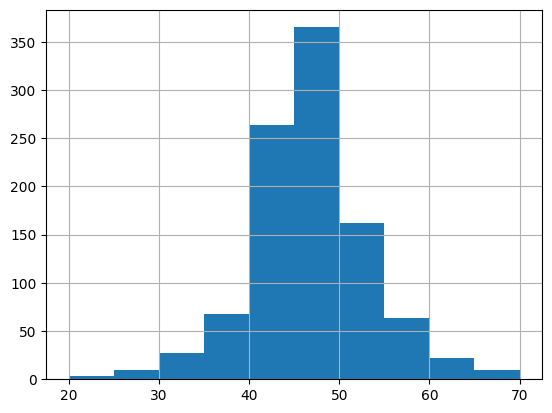

In [3]:
data["glucose"].hist()#histogram distribution of glucose feature

<Axes: >

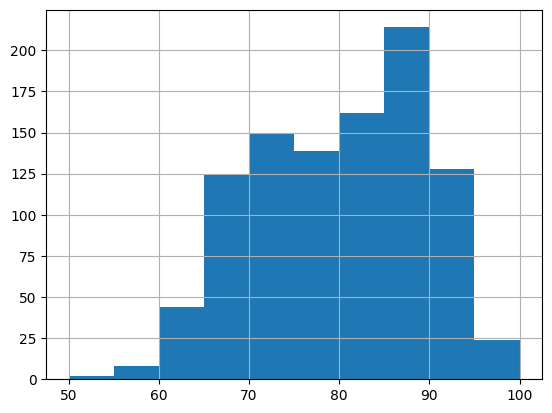

In [4]:
data["bloodpressure"].hist()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [5]:
train,test = train_test_split(data,test_size=0.20)
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
gnb= GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9246231155778895

# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [ ]:
data2 = pd.read_csv("insurance.csv")
data2


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [ ]:
data2.dtypes
numerical_columns = data2.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = data2.select_dtypes(include=["object"]).columns
data2

In [ ]:

label_encoder = LabelEncoder()
for column in categorical_columns:
    data2[column] = label_encoder.fit_transform(data2[column])
data2

In [ ]:
scaler2 = MinMaxScaler()
data2[numerical_columns] = scaler2.fit_transform(data2[numerical_columns])
data2
#i didnt understand why you asked to separately scale the charges

### 5. Split the data.

In [ ]:
train,test = train_test_split(data2,test_size=0.25)
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values
X_train

### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [ ]:
svr = SVR()
hyperparameters = {'kernel':['linear','rbf','poly','sigmoid'], 'gamma':['scale', 'auto']}
rscv = RandomizedSearchCV(estimator=svr, param_distributions=hyperparameters, cv=3)
rscv.fit(X_train,y_train)
best_parameters = rscv.best_params_
svr = SVR(kernel=best_parameters['kernel'], gamma=best_parameters['gamma'])
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
print("best parameters:", best_parameters)
print("mae:", mae)
print("mse:", mse)

### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [ ]:
abr= AdaBoostRegressor()
hyperparameters = {'n_estimators':list(range(50,100)), 'loss': ['linear','square','exponential']}
gscv = GridSearchCV(abr, hyperparameters, cv=3)
gscv.fit(X_train,y_train)
best_parameters = gscv.best_params_
abr = AdaBoostRegressor(n_estimators=best_parameters['n_estimators'], loss = best_parameters['loss'])
abr.fit(X_train,y_train)
y_pred_abr = abr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred_abr)
mse = mean_squared_error(y_test,y_pred_abr)
print("best parameters:", best_parameters)
print("mae:", mae)
print("mse:", mse)

8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [ ]:
data1 = pd.read_csv("bookmyshow_ads.csv")
data1

### 2. Split the data.

In [ ]:
train, test = train_test_split(data1,test_size = 0.1,random_state=10)
X_test = test.iloc[:,1:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,1:-1].values
y_train = train.iloc[:,-1].values
X_test


### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [ ]:
#decision tree
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print("accuracy score of DecisionTreeClassifier: ",accuracy_score(y_pred_dtc,y_test))


In [ ]:
#rANDOM fOREST
rfc = RandomForestClassifier(max_features='log2', n_estimators=500)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print("accuracy score of RandomForestClassifier: ",accuracy_score(y_pred_rfc,y_test))

In [ ]:
#adaboost
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train,y_train)
y_pred_abc = abc.predict(X_test)
print("accuracy score of AdaBoostClassifier: ",accuracy_score(y_pred_abc,y_test))

In [ ]:
#gradient boost
gbc = GradientBoostingClassifier(n_estimators=500)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
print("accuracy score of GradientBoostingClassifier: ",accuracy_score(y_pred_gbc,y_test))

In [ ]:
#XGBoost
import xgboost 
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print("accuracy score of XGBoostingClassifier: ",accuracy_score(y_pred_xgb,y_test))

# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [ ]:
data4 = pd.read_csv("segmentation data.csv")
data4

### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [ ]:
data4.drop(columns=['ID'], inplace=True)
data4

In [ ]:
data4.isna().sum()

In [ ]:
scaler = MinMaxScaler()
data4.columns = scaler.fit_transform(data4.columns)
data4

In [ ]:
def age_to_category(age):
    if age >= 0.90:
        return 9
    elif age >= 0.80:
        return 8
    elif age >= 0.70:
        return 7
    elif age >= 0.60:
        return 6
    elif age >= 0.50:
        return 5
    elif age >= 0.40:
        return 4
    elif age >= 0.30:
        return 3
    elif age >= 0.20:
        return 2
    elif age >= 0.10:
        return 1
    else:
        return 0

data4['Age'] = data4['Age'].apply(age_to_category)
data4

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

In [ ]:
from sklearn.cluster import KMeans


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.